# Diamond Price Prediction

## Description

**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content**

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond color, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of the top of diamond relative to widest point (43--95)

## Explore the Data

### Get Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
data.drop(['Id'], axis=1, inplace=True)

In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


### Categories: cut, color, clarity

In [8]:
categories_columns = ['cut', 'color', 'clarity']
for category in categories_columns:
    print(data[category].value_counts())
    print()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64



### Numeric values

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Remove zeros:** min values for x,y,z are 0 and this is not possible for the diamontions of a diamond that why we remove them.

In [54]:
data.shape

(43152, 10)

In [60]:
data = data[data['x'] != 0]
data = data[data['y'] != 0]
data = data[data['z'] != 0]
data.shape

(43135, 10)

### Histograms

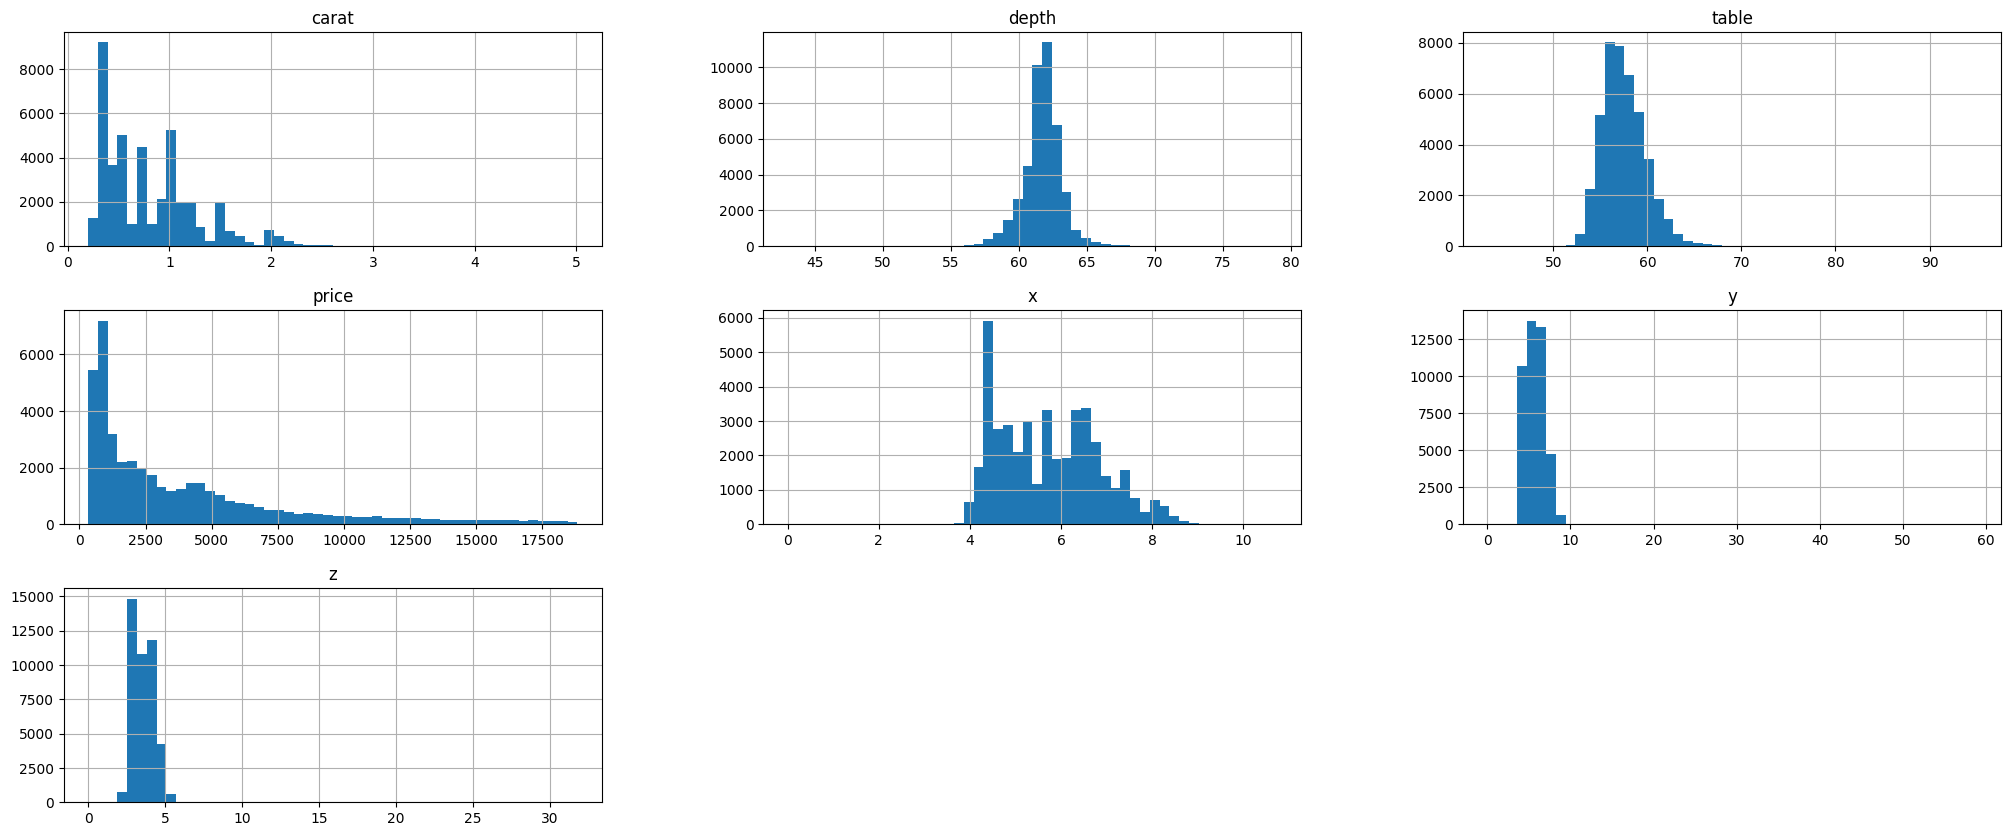

In [10]:
data.hist(bins=50, figsize=(25,10));

### Correlation

In [11]:
numeric_data = data.drop(categories_columns, axis=1)
corr_matrix = numeric_data.corr()
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


### Correlation heatmap

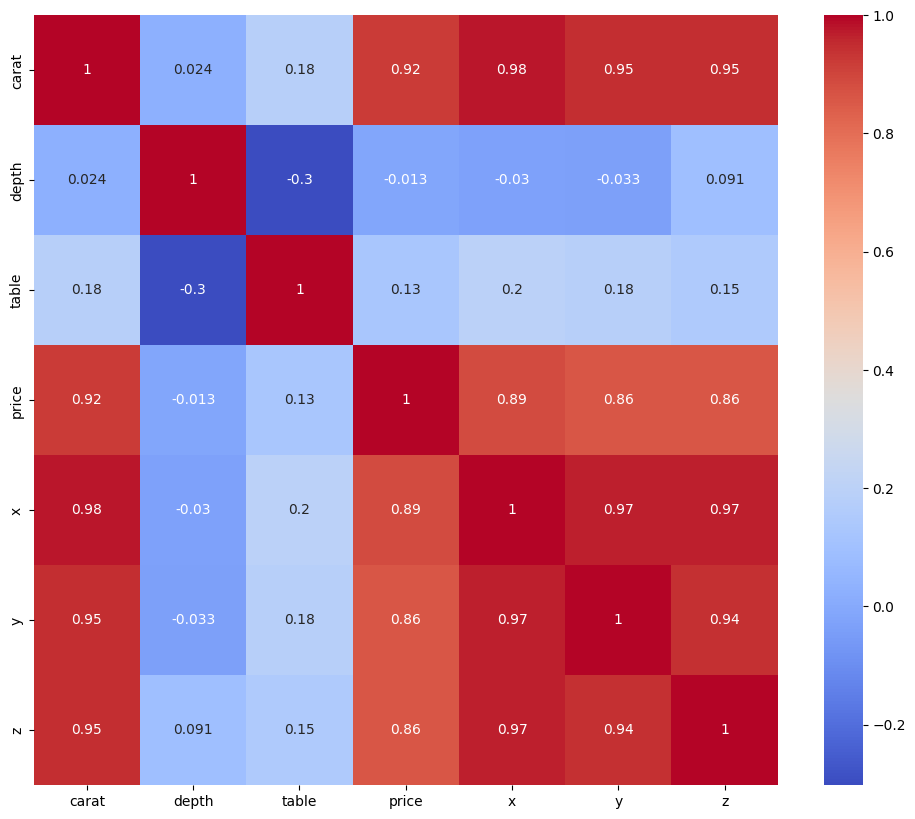

In [12]:
import seaborn as sns

plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, annot=True ,cmap = 'coolwarm')
plt.show()

### BoxPlot

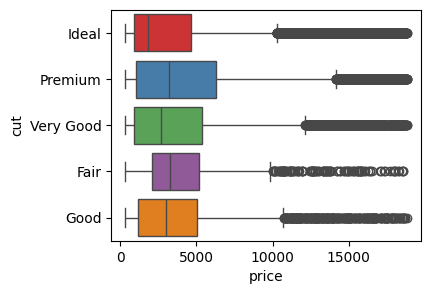

In [51]:
plt.figure(figsize=(4, 3))
sns.boxplot(data, x='price', y='cut', hue='cut', palette='Set1', legend=False);

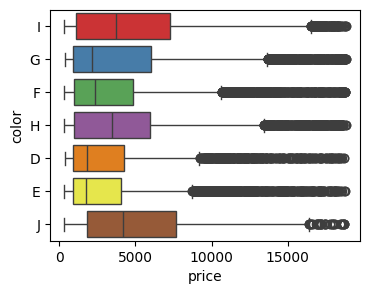

In [52]:
plt.figure(figsize=(4, 3))
sns.boxplot(data, x='price', y='color', hue='color', palette='Set1', legend=False);

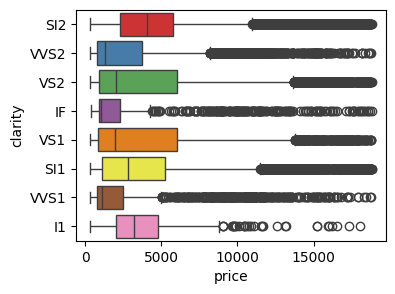

In [53]:
plt.figure(figsize=(4, 3))
sns.boxplot(data, x='price', y='clarity', hue='clarity', palette='Set1', legend=False);

### Split the Data

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=1) 

X_train = train_set.drop('price', axis=1)
y_train = train_set['price']

X_test = test_set.drop('price', axis=1)
y_test = test_set['price']

## Prepare the Data for ML Algorithms

### Column Droper

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

In [19]:
class ColumnDroper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X, y=None):
        # drop depth
        X.drop('depth', axis=1, inplace=True)

        # add size
        x = X['x'].values
        y = X['y'].values
        z = X['z'].values

        size = x * y * z
        X['size'] = size

        # drop x,y,z
        X.drop(['x', 'y', 'z'], axis=1, inplace=True)
        return X

### Ordinal Encoder

In [20]:
class MyOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
        self.color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
        self.clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

    def fit(self, X, y=None):
        return self
    
    def transform(self, data):
        data['cut_encoded'] = data['cut'].map(self.cut_mapping)
        data['color_encoded'] = data['color'].map(self.color_mapping)
        data['clarity_encoded'] = data['clarity'].map(self.clarity_mapping)

        return data.drop(categories_columns, axis=1)


### Pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('column_droper', ColumnDroper()),
    ('std_scalar', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, list(numeric_data.drop('price', axis=1))),
    ('cat', MyOrdinalEncoder(), categories_columns)
])

In [22]:
X_prepared = full_pipeline.fit_transform(X_train)

## Select and Train a Model

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_prepared, y_train)

LinearRegression()

In [24]:
from sklearn.model_selection import cross_val_score

linear_model_scores = cross_val_score(
    linear_model, X_prepared, y_train,
    scoring='neg_mean_squared_error', cv=10
)

In [25]:
linear_model_rmse = np.sqrt(-linear_model_scores)

In [26]:
def print_socres(rmse):
    print(f'Scores:\n {rmse}')
    print(f'Mean: {np.mean(rmse)}')
    print(f'Standard Deviation: {np.std(rmse)}')

In [27]:
print_socres(linear_model_rmse)

Scores:
 [1240.7046742  1212.34187422 1310.70888578 1179.54224931 1216.88932879
 1317.0366102  1198.50034082 1224.680792   1231.48926201 1221.71301201]
Mean: 1235.3607029333923
Standard Deviation: 42.470710770062944


1200 error is large considering that most prices goes between $900 - $5,300 with std: 3,900

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_prepared, y_train)

DecisionTreeRegressor()

In [30]:
tree_model_scores = cross_val_score(
    tree_model, X_prepared, y_train,
    scoring='neg_mean_squared_error', cv=10
)

In [31]:
tree_model_rmse = np.sqrt(-tree_model_scores)
print_socres(tree_model_rmse)

Scores:
 [737.75487206 713.71717896 776.44635523 735.35317497 744.60006625
 769.52422643 699.53363883 781.29020467 741.75045548 743.02707931]
Mean: 744.2997252174212
Standard Deviation: 24.715088412665388


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_prepared, y_train)

RandomForestRegressor()

In [33]:
forest_model_scores = cross_val_score(
    forest_model, X_prepared, y_train,
    scoring='neg_mean_squared_error', cv=10
)

In [34]:
forest_model_rmse = np.sqrt(-forest_model_scores)
print_socres(forest_model_rmse)

Scores:
 [541.97539405 556.05003693 609.1221899  556.59258239 547.98593167
 602.56429229 527.00188593 607.42380141 546.85434047 571.76389733]
Mean: 566.7334352359389
Standard Deviation: 28.13688699211876


### Save Models

In [36]:
# CODE HERE
import joblib

joblib.dump(linear_model, 'models\linear_model.pkl')
joblib.dump(tree_model, 'models\desicion_tree_model.pkl')
joblib.dump(forest_model, 'models\\random_forest_model.pkl')

# For later: load the model
#model = joblib.load("models\model.pkl")

['models\\random_forest_model.pkl']

## Fine-Tune

In [46]:
import joblib

model = joblib.load("models\\random_forest_model.pkl")

### Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=forest_model, param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=3, n_jobs=-1, verbose=2
)

In [38]:
grid_search.fit(X_prepared, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [39]:
print(f"Best parameters found: {grid_search.best_params_}")
np.sqrt(-grid_search.best_score_)

Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}


578.6884914900678

In [40]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(f'{np.sqrt(-mean_score):.2f} : {params}')

580.57 : {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
582.40 : {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
579.90 : {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
581.76 : {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
581.32 : {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
580.60 : {'max_depth': None, 'max_features': 'log2', 'n_estimators': 300}
632.24 : {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
626.53 : {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
628.60 : {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
628.79 : {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
631.41 : {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
630.88 : {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}
582.22 : {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
582.79 : {'max_depth': 20, 'max_features': 'sqrt', '

In [50]:
importance = grid_search.best_estimator_.feature_importances_

features = X_train.columns
feature_importance_pair = zip(importance, features)
sorted(feature_importance_pair, reverse=True)

[(0.45246570239355094, 'carat'),
 (0.4467006284104418, 'color'),
 (0.05454875704233882, 'table'),
 (0.03053065992139165, 'depth'),
 (0.009645461119368447, 'cut'),
 (0.006108791112908263, 'clarity')]

In [42]:
import joblib

joblib.dump(grid_search.best_estimator_, 'models/best_model.pkl')

['models/best_model.pkl']

## Test

In [44]:
model = joblib.load('models/best_model.pkl')

X_test_prepared = full_pipeline.transform(X_test)
prediction = model.predict(X_test_prepared)

In [45]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
rmse

564.7309391601628

## Submution

In [46]:
test = pd.read_csv('test.csv')

ID = test['Id']
test_prepared = full_pipeline.transform(test.drop('Id', axis=1)) 
price = model.predict(test_prepared)

result = {'ID': ID, 'price': price}
sub = pd.DataFrame(result)
sub.to_csv('sub.csv', index=False)